In [18]:
import pandas as pd

# Informações Básicas do Dataset

In [51]:
url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
df = pd.read_csv(url)
df

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000
...,...,...,...,...,...,...,...,...
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000
10006,"Rua Manuel Onha, , 514",Vila Oratório,São Paulo,185,3,2,2,R$ 2.200\n /Mês


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


# 1. Média da Metragem por bairro

In [121]:
qtd_dados_por_bairro = df["Bairro"].value_counts()
qtd_dados_por_bairro.describe()

count    701.000000
mean      14.259629
std       39.043213
min        1.000000
25%        1.000000
50%        3.000000
75%        9.000000
max      409.000000
Name: Bairro, dtype: float64

In [132]:
bairros_com_mais_de_um_dado = qtd_dados_por_bairro.to_frame()
bairros_com_mais_de_um_dado.columns = ["Qtd"]
bairros_com_mais_de_um_dado = bairros_com_mais_de_um_dado.query("Qtd > 1").index
bairros_com_mais_de_um_dado

Index(['Alto de Pinheiros', 'Jardim Guedala', 'Jardim Paulista',
       'Brooklin Paulista', 'Jardim Europa', 'Cidade Jardim', 'Vila Madalena',
       'Pacaembu', 'Planalto Paulista', 'Jardim Leonor',
       ...
       'Vila Santa Edwiges', 'Vila Paiva', 'Jardim Sabará',
       'Jardim Santa Fé (Zona Sul)', 'Vila Perus', 'Jardim Heliomar',
       'Bom Retiro', 'Vila Celeste', 'Vila Ayrosa', 'Vila Liviero'],
      dtype='object', length=517)

In [134]:
media_metragem_por_bairro = df[df["Bairro"].isin(bairros_com_mais_de_um_dado)].groupby("Bairro").mean()[["Metragem"]]
media_metragem_por_bairro

,Metragem
Bairro,
Aclimação,253.056818
Alto da Boa Vista,418.875000
Alto da Lapa,294.337209
Alto da Mooca,270.050000
Alto de Pinheiros,433.444988
...,...
Vila Água Funda,152.200000
Água Branca,191.000000
Água Fria,165.416667


# 2. Formas de Consulta de Dados por Bairro

In [74]:
df[df["Bairro"] == "Aclimação"]

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
269,"Rua Ximbó, 410",Aclimação,São Paulo,140,4,3,4,800
670,"Rua Alabastro, 151",Aclimação,São Paulo,129,3,2,3,960
1265,Rua Carlos Chagas,Aclimação,São Paulo,280,3,2,2,2
1287,Rua Doutor João Maia,Aclimação,São Paulo,380,3,5,2,2
1347,Rua Doutor João Maia,Aclimação,São Paulo,385,3,5,2,2
...,...,...,...,...,...,...,...,...
9260,"Rua Doutor Rafael Caramuru Lanzelloti, 77",Aclimação,São Paulo,120,3,2,1,900
9366,Rua Baturité,Aclimação,São Paulo,156,3,4,1,800
9418,Rua André Gouveia,Aclimação,São Paulo,199,3,4,3,1
9539,Rua Rubi,Aclimação,São Paulo,1500,4,2,6,5


In [75]:
df.query("Bairro == 'Aclimação'")

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
269,"Rua Ximbó, 410",Aclimação,São Paulo,140,4,3,4,800
670,"Rua Alabastro, 151",Aclimação,São Paulo,129,3,2,3,960
1265,Rua Carlos Chagas,Aclimação,São Paulo,280,3,2,2,2
1287,Rua Doutor João Maia,Aclimação,São Paulo,380,3,5,2,2
1347,Rua Doutor João Maia,Aclimação,São Paulo,385,3,5,2,2
...,...,...,...,...,...,...,...,...
9260,"Rua Doutor Rafael Caramuru Lanzelloti, 77",Aclimação,São Paulo,120,3,2,1,900
9366,Rua Baturité,Aclimação,São Paulo,156,3,4,1,800
9418,Rua André Gouveia,Aclimação,São Paulo,199,3,4,3,1
9539,Rua Rubi,Aclimação,São Paulo,1500,4,2,6,5


# 3. Gráficos e Insights

Bairros com maior média de metragem

<AxesSubplot:ylabel='Bairro'>

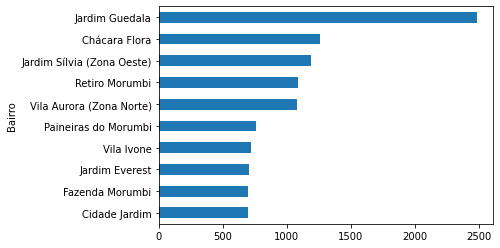

In [137]:
media_metragem_por_bairro["Metragem"].sort_values(ascending=False).head(10).sort_values().plot.barh()

# 4. Estatísticas Básicas

In [76]:
df.describe()

,Metragem,Quartos,Banheiros,Vagas
count,10008.000000,10008.000000,10008.000000,10008.000000
mean,442.300659,3.483114,3.879097,4.097222
std,7515.379389,1.064200,1.988467,2.824014
min,10.000000,1.000000,1.000000,1.000000
25%,173.000000,3.000000,2.000000,2.000000
50%,290.000000,3.000000,4.000000,4.000000
75%,460.250000,4.000000,5.000000,5.000000
max,750000.000000,16.000000,40.000000,50.000000


# 5. Bairros sem nome de Rua

In [77]:
df[df["Bairro"].isna()]

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
7263,"Rua Madalena de Morais, 3773",NaN,São Paulo,742,4,8,6,9
7956,Rua Vergueiro,NaN,São Paulo,103,3,2,2,640
7996,"Rua Alvorada do Sul, 3773",NaN,São Paulo,678,4,8,8,6
8126,"Rua Professor Eduardo Monteiro, 3773",NaN,São Paulo,550,3,5,6,4
8566,"Avenida Comendador Adibo Ares, 3773",NaN,São Paulo,694,4,6,6,3
8619,"Rua Alvorada do Sul, 3773",NaN,São Paulo,683,4,8,8,6
8739,"Rua Alvorada do Sul, 3773",NaN,São Paulo,683,4,8,8,6
8868,"Rua Professor Eduardo Monteiro, 3773",NaN,São Paulo,555,3,5,6,4
8943,"Rua Santo Eufredo, 3773",NaN,São Paulo,846,4,8,8,30
8992,"Rua Professor Eduardo Monteiro, 3773",NaN,São Paulo,555,3,5,6,4
